Generating Random Graphs

Notes from Sayama's book ch15

- Examples of networks being created using deterministic methods:
    - manually adding nodes and edges.
    - importing data files.
    - etc.

- But, sometimes we want to have a randomly generated network.

- Why do we want randomly generated networks? See below.

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

```nx.gnm_random_graph(n, m)``` geneates a random graph made of $n$ nodes and $m$ edges.

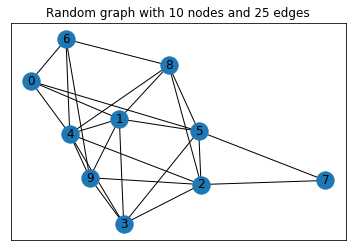

In [2]:
N1 = 10
M1 = 25
G1 = nx.gnm_random_graph(N1, M1)
nx.draw_networkx(G1)
plt.title("Random graph with {} nodes and {} edges".format(N1, M1))
plt.show()

```nx.gnp_random_graph(n, p)``` geneates a random graph made of $n$ nodes, and each node pair is connected with probability $p$.

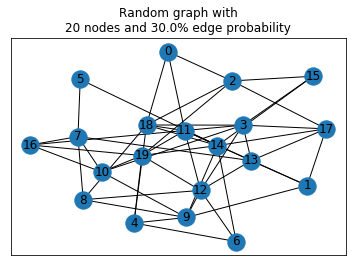

In [3]:
N2 = 20
p2 = 0.3
G2 = nx.gnp_random_graph(N2, p2)
nx.draw_networkx(G2)
plt.title("Random graph with\n{} nodes and {}% edge probability".format(N2, p2*100))
plt.show()

```nx.gnm_random_graph(n, m)``` and ```nx.gnp_random_graph(n, p)``` used above generate random graphs called _Erdos-Renyi random graphs_.

<font color=red>Write more about Erdos-Renyi random graphs...</font>

---

```nx.random_regular_graph(k, n)``` generates a random regular graph made of $n$ nodes, all of which have the same degree $k$.

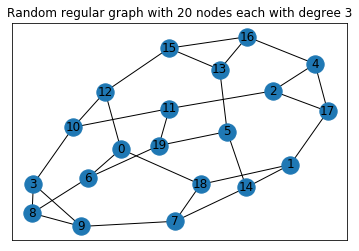

In [4]:
d3 = 3
N3 = 20
G3 = nx.random_regular_graph(d3, N3)
nx.draw_networkx(G3)
plt.title("Random regular graph with {} nodes each with degree {}".format(N3, d3))
plt.show()

<font color=red>Read the following!!!</font>

https://egtheory.wordpress.com/2012/03/29/random-regular-graphs/

https://en.wikipedia.org/wiki/Random_regular_graph

---

```nx.random_degree_sequence_graph(list)``` generates a random graph whose nodes have degrees specified in ```list```.

<font color=red> Note: this function may not be able to generate a graph within a given number of trials (which is 10 by default). WHAT DOES THIS MEAN?</font>

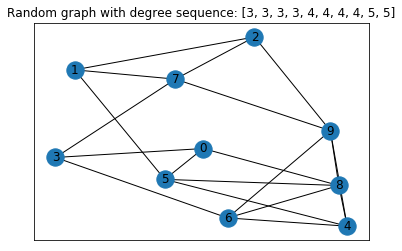

In [5]:
# MyDegSeq = [3,3,3,3,4,4,4,4,5,5]
MyDegSeq = [3]*4 + [4]*4 + [5]*2
# The above two generate the same degree sequence.

G4 = nx.random_degree_sequence_graph(MyDegSeq)
nx.draw_networkx(G4)
plt.title("Random graph with degree sequence: {}".format(MyDegSeq))
plt.show()

---

- Random graphs can also be generated by randomizing existing graph topologies. This is useful when you want to compare a certain property of an observed network with that of a randomized "null" model.
    - Eg: suppose you are studying information spreading on a network. To study the role of the network's specific topology on the rate and nature of information spreading, one can compare with a corresponding randomized network.

- How to randomize network topologies? It depends on which network properties are to be conserved during randomization.

- Let ```G``` be the original network to be randomized.
Let ```N``` = number of nodes of ```G```, Let ```M``` = number of edges of ```G```,
```DegSeq``` = degree sequence of ```G```.

- ```nx.gnm_random_graph(N, M)``` conserves only the number of nodes and edges, and nothing else.

- ```nx.random_degree_sequence_graph(DegSeq)``` conserves number of nodes and egdes, and the sequence of node degrees. <font color=red> Note: this may not generate a graph within a given number of trials. WHAT DOES THIS MEAN? </font>

- ```nx.expected_degree_graph(DegSeq)``` conserves number of nodes and the sequence of "expected" node degrees. <font color=red> WHAT DOES "EXPECTED NODE DEGREE" MEAN? </font>
    - This function can generate a graph very quickly.
    - Uses the Miller-Hagberg algo.
    - The generated network's degree sequence doesn't exactly match that of the input (esp if the network is dense), but this method is a practical, reasonable approach for the randomization of large real-world networks.

- ```nx.double_edge_swap(G)``` conserves number of nodes and edges and sequence of node degrees.
    - All the previous functions are graph generators. This one is not. It directly modifies the topology of graph ```G```, by conducting a _double edge swap_
        - Double edge swap: Take edges $a-b$ and $c-d$. Remove those edges. Create new edges $a-c$ and $b-d$. If either pair is already connected, another swap is attempted. 
    - This operation realizes a slight randomization of the topology of ```G```. By repeating it many times, you can gradually randomize the topology from the original ```G``` to a completely randomized network.
    -  ```nx.double_edge_swap(G, k)``` conducts $k$ double edge swaps.
    -  ```nx.connected_double_edge_swap``` guarantees that the resulting graph remains connected.

---

Exercise 15.15

Randomize the topology of Zachary's Karate Club graph by using each of the following functions and visualize the results:

In [6]:
G_ZKC = nx.karate_club_graph()

In [7]:
ZKC_DegSeq = [d for n, d in G_ZKC.degree()] #Degree sequence of ZKC graph.

In [8]:
print("ZKC graph number of nodes =", G_ZKC.number_of_nodes())
print("ZKC graph number of edges =", G_ZKC.number_of_edges())

ZKC graph number of nodes = 34
ZKC graph number of edges = 78


#### 1. gnm_random_graph

This conserves only the number of nodes and edges, and nothing else.

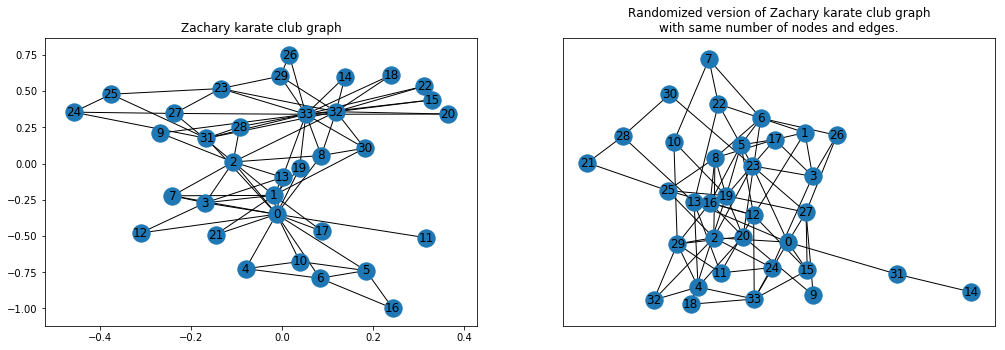

In [9]:
G_ZKC_1 = nx.gnm_random_graph(G_ZKC.number_of_nodes(), G_ZKC.number_of_edges())

fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes([1.2, 0, 1, 1])

nx.draw_networkx(G_ZKC, ax=ax1)
nx.draw_networkx(G_ZKC_1, ax=ax2)

ax1.set_title("Zachary karate club graph")
ax2.set_title("Randomized version of Zachary karate club graph\nwith same number of nodes and edges.")
plt.show()

In [10]:
print("Randomized graph number of nodes =", G_ZKC.number_of_nodes())
print("Randomized graph number of edges =", G_ZKC.number_of_edges())

Randomized graph number of nodes = 34
Randomized graph number of edges = 78


In [11]:
print("Old deg seq:", np.sort([d for n, d in G_ZKC.degree]))
print("New deg seq:", np.sort([d for n, d in G_ZKC_1.degree]))

Old deg seq: [ 1  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  4  4  4  4  4  4
  5  5  5  6  6  9 10 12 16 17]
New deg seq: [1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 5 6 6 6 6 6 6 7 7 7 7 7 9]


#### 2. random_degree_sequence_graph

This conserves number of nodes and egdes, and the sequence of node degrees.

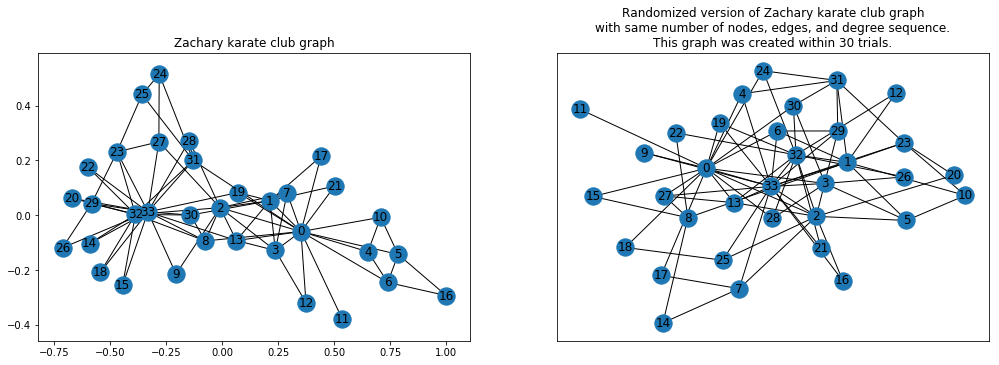

CPU times: user 2.72 s, sys: 29.7 ms, total: 2.75 s
Wall time: 2.76 s


In [13]:
%%time
NumTries = 30
G_ZKC_2 = nx.random_degree_sequence_graph(ZKC_DegSeq, tries=NumTries)

fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes([1.2, 0, 1, 1])

nx.draw_networkx(G_ZKC, ax=ax1)
nx.draw_networkx(G_ZKC_2, ax=ax2)

ax1.set_title("Zachary karate club graph")
MyTitle = "Randomized version of Zachary karate club graph\n"+\
            "with same number of nodes, edges, and degree sequence.\n"+\
            "This graph was created within {} trials.".format(NumTries)
ax2.set_title(MyTitle)
plt.show()

In [14]:
print("Randomized graph number of nodes =", G_ZKC_2.number_of_nodes())
print("Randomized graph number of edges =", G_ZKC_2.number_of_edges())

Randomized graph number of nodes = 34
Randomized graph number of edges = 78


In [15]:
print("Old deg seq:", np.sort([d for n, d in G_ZKC.degree]))
print("New deg seq:", np.sort([d for n, d in G_ZKC_2.degree]))

Old deg seq: [ 1  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  4  4  4  4  4  4
  5  5  5  6  6  9 10 12 16 17]
New deg seq: [ 1  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  4  4  4  4  4  4
  5  5  5  6  6  9 10 12 16 17]


In [16]:
np.sort([neigh for neigh in G_ZKC_2.neighbors(2)])

array([ 0,  5,  7, 13, 16, 20, 25, 29, 32, 33])

In [17]:
NodeList = [n for n in G_ZKC.nodes()]
for n in NodeList[:5]:
    print("\nNode {}:".format(n))
    print("Old graph neighbours:", np.sort([neigh for neigh in G_ZKC.neighbors(n)]))
    print("New graph neighbours:", np.sort([neigh for neigh in G_ZKC_2.neighbors(n)]))


Node 0:
Old graph neighbours: [ 1  2  3  4  5  6  7  8 10 11 12 13 17 19 21 31]
New graph neighbours: [ 2  3  4  6  9 11 13 15 17 18 19 24 27 28 30 33]

Node 1:
Old graph neighbours: [ 0  2  3  7 13 17 19 21 30]
New graph neighbours: [ 5  6  8 10 12 23 31 32 33]

Node 2:
Old graph neighbours: [ 0  1  3  7  8  9 13 27 28 32]
New graph neighbours: [ 0  5  7 13 16 20 25 29 32 33]

Node 3:
Old graph neighbours: [ 0  1  2  7 12 13]
New graph neighbours: [ 0  5 26 28 30 33]

Node 4:
Old graph neighbours: [ 0  6 10]
New graph neighbours: [ 0 31 33]


#### 3. expected_degree_graph

This conserves number of nodes and the sequence of "expected" node degrees.

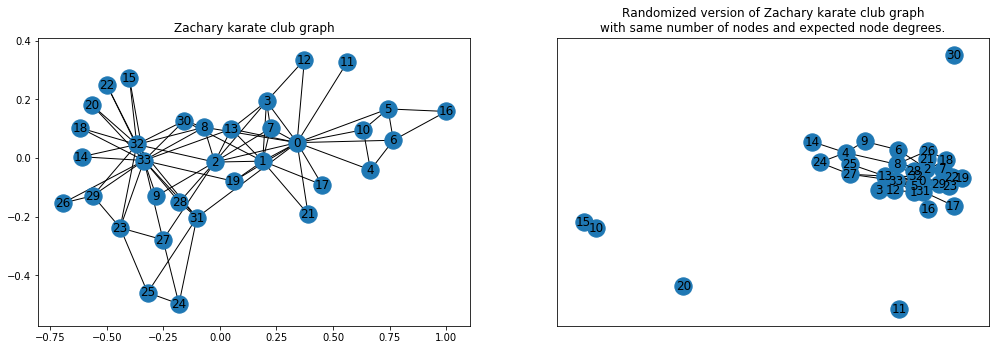

In [18]:
G_ZKC_3 = nx.expected_degree_graph(ZKC_DegSeq)

fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes([1.2, 0, 1, 1])

nx.draw_networkx(G_ZKC, ax=ax1)
nx.draw_networkx(G_ZKC_3, ax=ax2)

ax1.set_title("Zachary karate club graph")
MyTitle = "Randomized version of Zachary karate club graph\nwith same number of nodes and expected node degrees."
ax2.set_title(MyTitle)
plt.show()

In [19]:
print("Randomized graph number of nodes =", G_ZKC_3.number_of_nodes())
print("Randomized graph number of edges =", G_ZKC_3.number_of_edges())

print("\nNote that number of edges changes every time I run this code.")
print("Only sometimes it is the same as number of edges of the original graph.")

Randomized graph number of nodes = 34
Randomized graph number of edges = 75

Note that number of edges changes every time I run this code.
Only sometimes it is the same as number of edges of the original graph.


In [20]:
print("Old deg seq:", np.sort([d for n, d in G_ZKC.degree]))
print("New deg seq:", np.sort([d for n, d in G_ZKC_3.degree]))

Old deg seq: [ 1  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  4  4  4  4  4  4
  5  5  5  6  6  9 10 12 16 17]
New deg seq: [ 0  0  1  1  1  1  1  2  2  2  2  2  2  2  2  3  3  3  4  4  4  5  5  5
  6  6  6  8  9  9 10 11 13 15]


#### 4. double_edge_swap (5 times)

This conserves number of nodes and edges and sequence of node degrees. This is not a graph generator, rather modifies the existing graph.

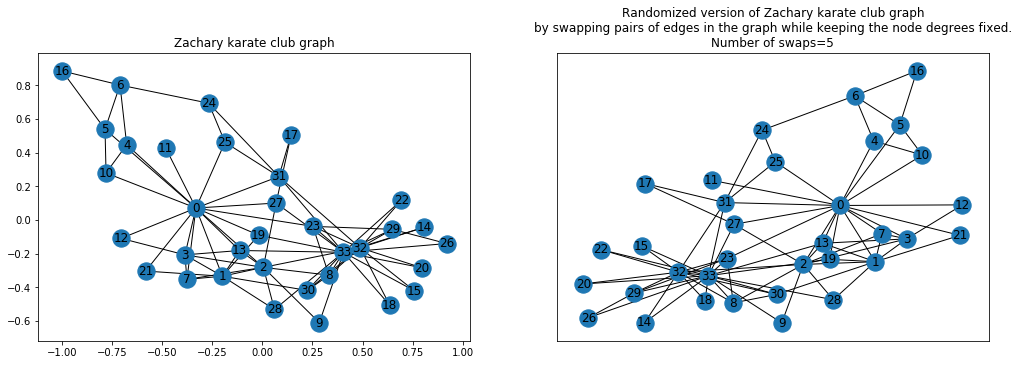

CPU times: user 569 ms, sys: 26.3 ms, total: 595 ms
Wall time: 595 ms


In [21]:
%%time
NumSwaps = 5
G_ZKC_4 = nx.double_edge_swap(G_ZKC, nswap=NumSwaps)

fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes([1.2, 0, 1, 1])

nx.draw_networkx(G_ZKC, ax=ax1)
nx.draw_networkx(G_ZKC_4, ax=ax2)

ax1.set_title("Zachary karate club graph")
MyTitle = "Randomized version of Zachary karate club graph\n"+\
            "by swapping pairs of edges in the graph while keeping the node degrees fixed.\n"+\
            "Number of swaps={}".format(NumSwaps)
ax2.set_title(MyTitle)
plt.show()

In [22]:
print("Randomized graph number of nodes =", G_ZKC_4.number_of_nodes())
print("Randomized graph number of edges =", G_ZKC_4.number_of_edges())

Randomized graph number of nodes = 34
Randomized graph number of edges = 78


In [23]:
print("Old deg seq:", np.sort([d for n, d in G_ZKC.degree]))
print("New deg seq:", np.sort([d for n, d in G_ZKC_4.degree]))

Old deg seq: [ 1  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  4  4  4  4  4  4
  5  5  5  6  6  9 10 12 16 17]
New deg seq: [ 1  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  4  4  4  4  4  4
  5  5  5  6  6  9 10 12 16 17]


#### 5. double_edge_swap (50 times) 

This conserves number of nodes and edges and sequence of node degrees. This is not a graph generator, rather modifies the existing graph.

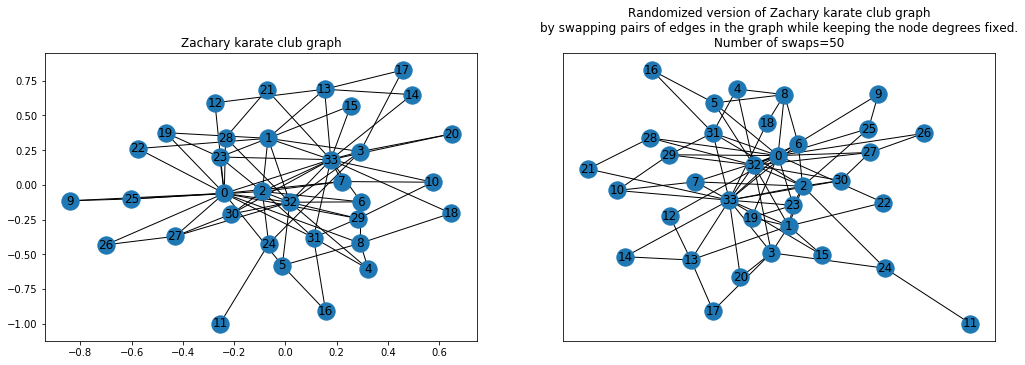

CPU times: user 557 ms, sys: 25.2 ms, total: 582 ms
Wall time: 582 ms


In [25]:
%%time
NumSwaps = 50
G_ZKC_5 = nx.double_edge_swap(G_ZKC, nswap=NumSwaps)

fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes([1.2, 0, 1, 1])

nx.draw_networkx(G_ZKC, ax=ax1)
nx.draw_networkx(G_ZKC_5, ax=ax2)

ax1.set_title("Zachary karate club graph")
MyTitle = "Randomized version of Zachary karate club graph\n"+\
            "by swapping pairs of edges in the graph while keeping the node degrees fixed.\n"+\
            "Number of swaps={}".format(NumSwaps)
ax2.set_title(MyTitle)
plt.show()

In [26]:
print("Randomized graph number of nodes =", G_ZKC_5.number_of_nodes())
print("Randomized graph number of edges =", G_ZKC_5.number_of_edges())

Randomized graph number of nodes = 34
Randomized graph number of edges = 78


In [27]:
print("Old deg seq:", np.sort([d for n, d in G_ZKC.degree]))
print("New deg seq:", np.sort([d for n, d in G_ZKC_5.degree]))

Old deg seq: [ 1  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  4  4  4  4  4  4
  5  5  5  6  6  9 10 12 16 17]
New deg seq: [ 1  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  4  4  4  4  4  4
  5  5  5  6  6  9 10 12 16 17]
